# Handling Outliers

***Extreme values are outliers***

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]


***Five point summary***

***min , 25th , 50th , 75th , 100th***

In [40]:
np.quantile(salary , [0 , 0.25 , 0.50 , 0.75 , .1])

array([11.  , 59.  , 71.  , 90.75, 45.3 ])

In [41]:
df = pd.DataFrame(salary , columns=['Salary'])

In [42]:
df.describe()

,Salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The Box plot')

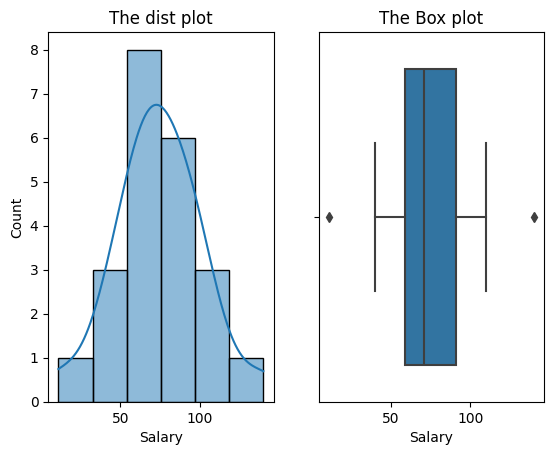

In [43]:
# to outlier >> distplot  ,  boxplot

plt.Figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary'] , kde=True)
plt.title('The dist plot')

plt.subplot(1, 2, 2)
sns.boxplot(data = df , x = 'Salary' )
plt.title('The Box plot')

***>> Dropping the outlier***

***>> Capping the outlier***

***>> replace with mean/median***

In [44]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR


print(lower_fence)
print(upper_fence)



11.375
138.375


In [45]:
df_filtered = df[(df.Salary >= lower_fence) & (df.Salary <= upper_fence)]

In [46]:
df_filtered

,Salary
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74
10,91


In [47]:
df_filtered.shape

(20, 1)

c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Box plot')

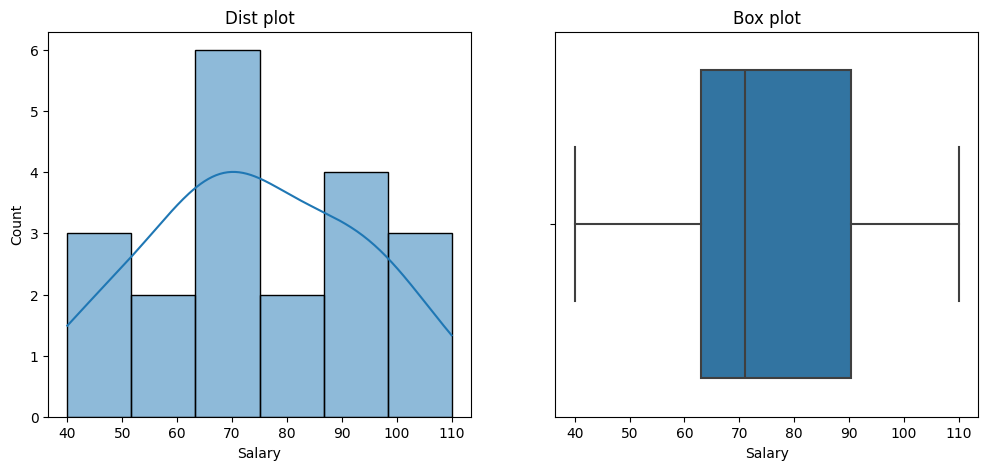

In [48]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['Salary'], kde = True)
plt.title("Dist plot")

plt.subplot(1, 2, 2)
sns.boxplot(data =df_filtered, x = 'Salary')
plt.title("Box plot")

In [52]:
#imputation with mean and media

df['Salary_imputed_median'] = np.where((df.Salary >= upper_fence) | (df.Salary <= lower_fence), df['Salary'].median(), df['Salary'])

In [53]:
df

,Salary,Salary_imputed_mean,Salary_imputed_median
0,11,74.318182,71.0
1,40,74.318182,40.0
2,45,74.318182,45.0
3,68,74.318182,68.0
4,65,74.318182,65.0
5,68,74.318182,68.0
6,78,74.318182,78.0
7,90,74.318182,90.0
8,57,74.318182,57.0
9,74,74.318182,74.0


c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


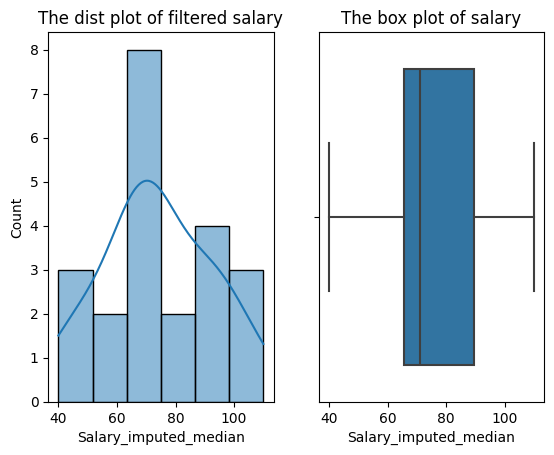

In [54]:
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_imputed_median'], kde=True)
plt.title("The dist plot of filtered salary")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Salary_imputed_median')
plt.title("The box plot of salary")

plt.show()

In [55]:
#Capping >> replacing with the nearest value which is not outlier

df


,Salary,Salary_imputed_mean,Salary_imputed_median
0,11,74.318182,71.0
1,40,74.318182,40.0
2,45,74.318182,45.0
3,68,74.318182,68.0
4,65,74.318182,65.0
5,68,74.318182,68.0
6,78,74.318182,78.0
7,90,74.318182,90.0
8,57,74.318182,57.0
9,74,74.318182,74.0


In [56]:
lower_cap = df['Salary'].quantile(0.05) #lower cap as 5th percentile
upper_cap = df['Salary'].quantile(0.95) #upper cap at 95th percentile

In [57]:
#replace outliers with the cap

df['Salary_capped'] = np.where(df['Salary'] < lower_cap, lower_cap,
        np.where(df['Salary'] > upper_cap, upper_cap,
                df['Salary']))

In [58]:
df

,Salary,Salary_imputed_mean,Salary_imputed_median,Salary_capped
0,11,74.318182,71.0,40.25
1,40,74.318182,40.0,40.25
2,45,74.318182,45.0,45.00
3,68,74.318182,68.0,68.00
4,65,74.318182,65.0,65.00
5,68,74.318182,68.0,68.00
6,78,74.318182,78.0,78.00
7,90,74.318182,90.0,90.00
8,57,74.318182,57.0,57.00
9,74,74.318182,74.0,74.00


c:\Users\mdaza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


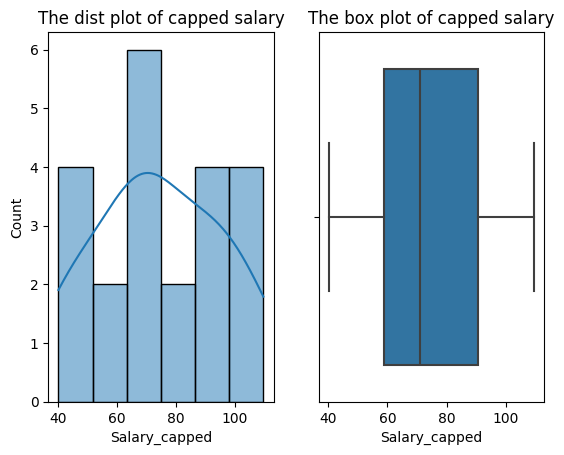

In [59]:
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_capped'], kde=True)
plt.title("The dist plot of capped salary")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Salary_capped')
plt.title("The box plot of capped salary")

plt.show()